# Trabajo semanal N°6

### a) Determine la expresión del filtro pasa altos normalizado

De las gráficas de módulo y fase se observa un cero doble de transmisión en $\omega = 3 $ (La fase aumenta en 180°). Se asume que en $ \omega_o $ el módulo cae 3db, por lo tanto el filtro de máxima planicidad es un Butterworth, por último, el filtro se considera de orden 3 debido a que en alta frecuencia tiene una caída de 20dB por década.

Con esas consideraciones se puede obtener la expresión de la transferencia del prototipo pasa bajos:

$$ T_{(s)} = \frac{s^2+9}{s^2+s+1}\frac{1}{s+1} $$

Y aplicando el kernel de transformacion $ K_{(s)} = s = \frac{1}{s} $ se halla la transferencia del filtro pasa altos normalizado:

$$ T_{(s)} = 9\frac{s^2+\frac{1}{9}}{s^2+s+1}\frac{s}{s+1} $$

### b) Realizar el diagrama de polos y ceros del filtro

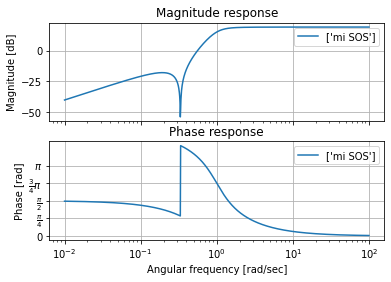

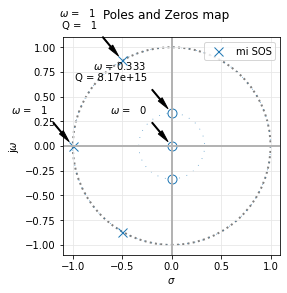

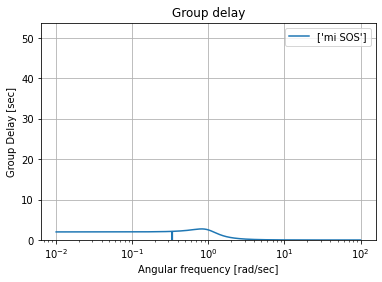

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq

num = np.array([9, 0, 1, 0]) 
den = np.array([1, 2, 2, 1])

mi_sos = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(mi_sos, 'mi SOS')

### c) Sintetizar el filtro

Se utilizó el siguiente circuito:

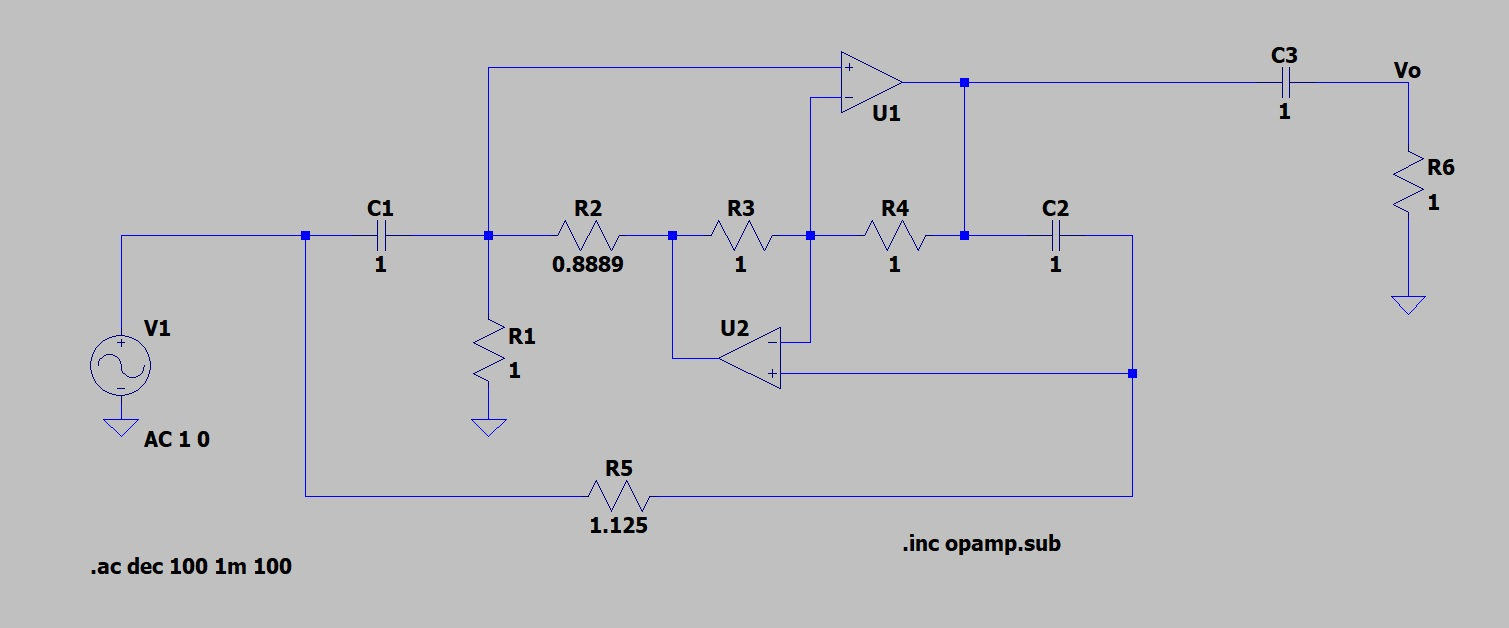


In [5]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

Vi, Vo, V1 = sp.symbols("Vi, Vo, V1")
R1, R2, C, R5 = sp.symbols("R1, R2, C, R5")

aa = sp.solve([ 
                -V1 + Vi/(R5*C + 1) + Vo*(R5*C/(R5*C+1)), 
                -V1 + Vi*(R1*R2*R5*C**2 + R1)/(R1*R2*R5*C**2 + R2*R5*C + R1) 
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi]

tf = transf_func.subs(C, s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tf)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf_final = sp.Mul(k,num/den, evaluate=False)

print("La función transferencia es: ")
display(tf_final)

La función transferencia es: 


1*((s**2 + (R1 - R2)/(C**2*R1*R2*R5))/(s**2 + s/(C*R1) + 1/(C**2*R2*R5)))

Teniendo en cuenta que $ \frac{1}{R_1C} = 1 , \frac{1}{R_2R_5C^2} = 1 \wedge 1-\frac{1}{R_1R_5C^2} $ y fijando $ C = 1 $ se obtiene:

$$ R_1 = 1 , R_2 = \frac{8}{9} \wedge R_5 = \frac{9}{8} $$

A continuación, el módulo de la transferencia del filtro pasa altos normalizado:

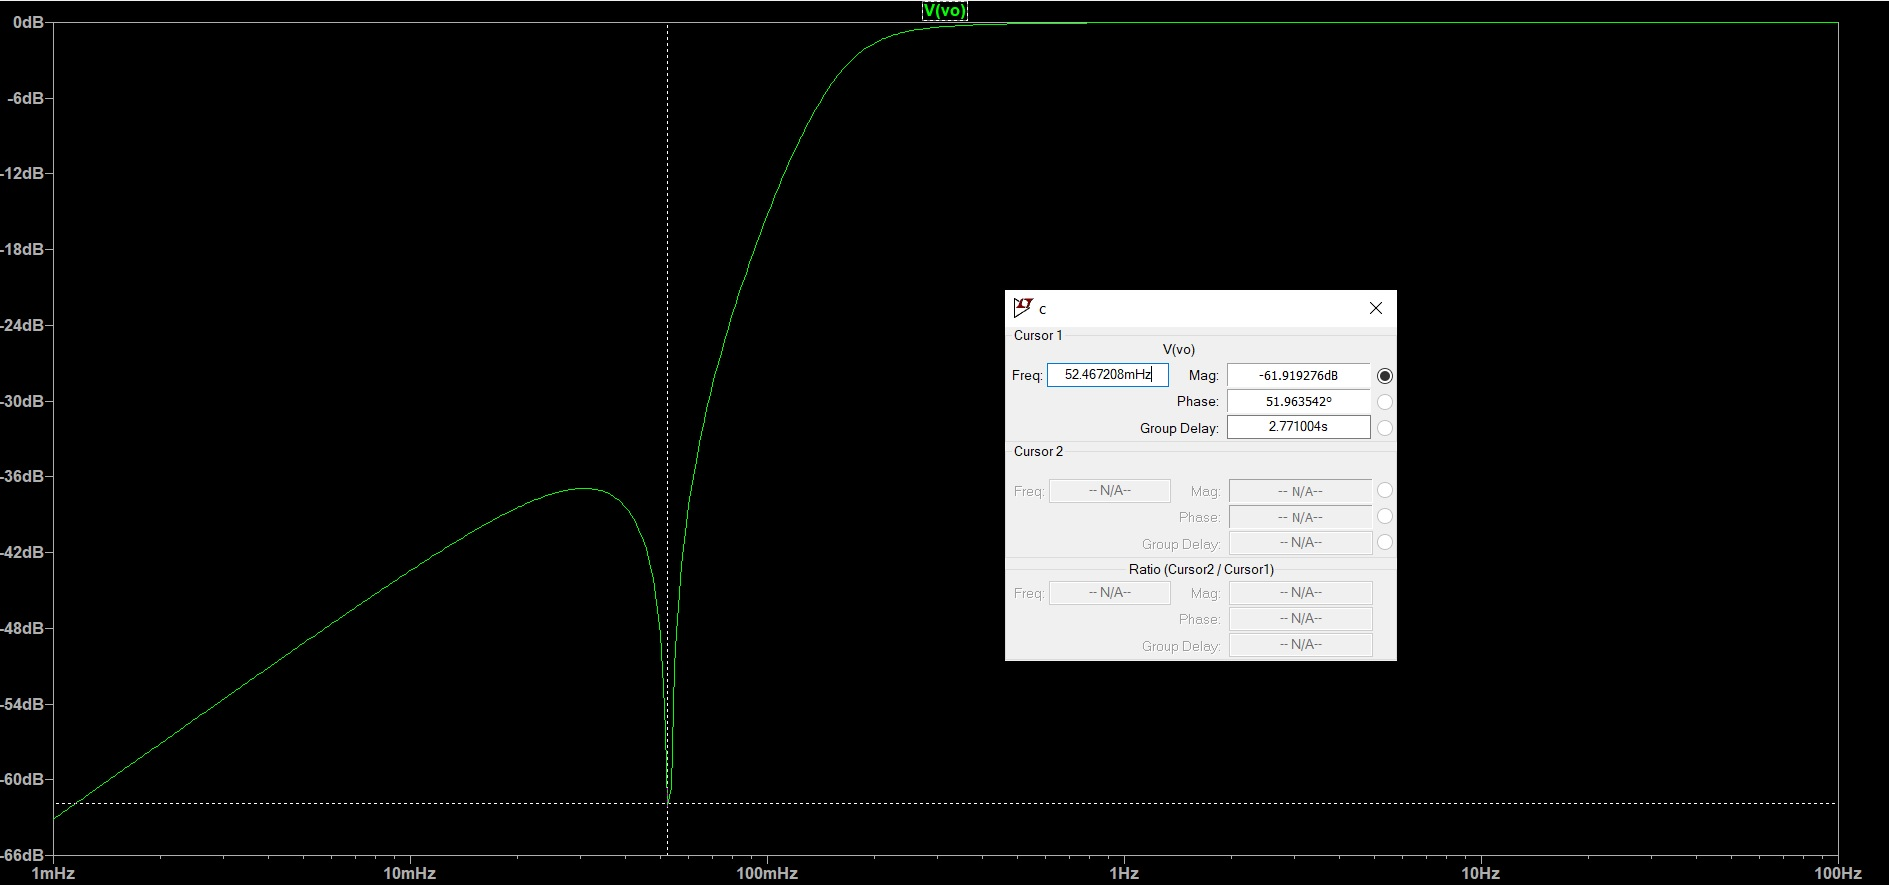

En la simulación se ve que los ceros de transmisión están en $ \omega = 53mHz $, exactamente un tercio de $ \omega_o $

### d) Red propuesta por el Schaumann

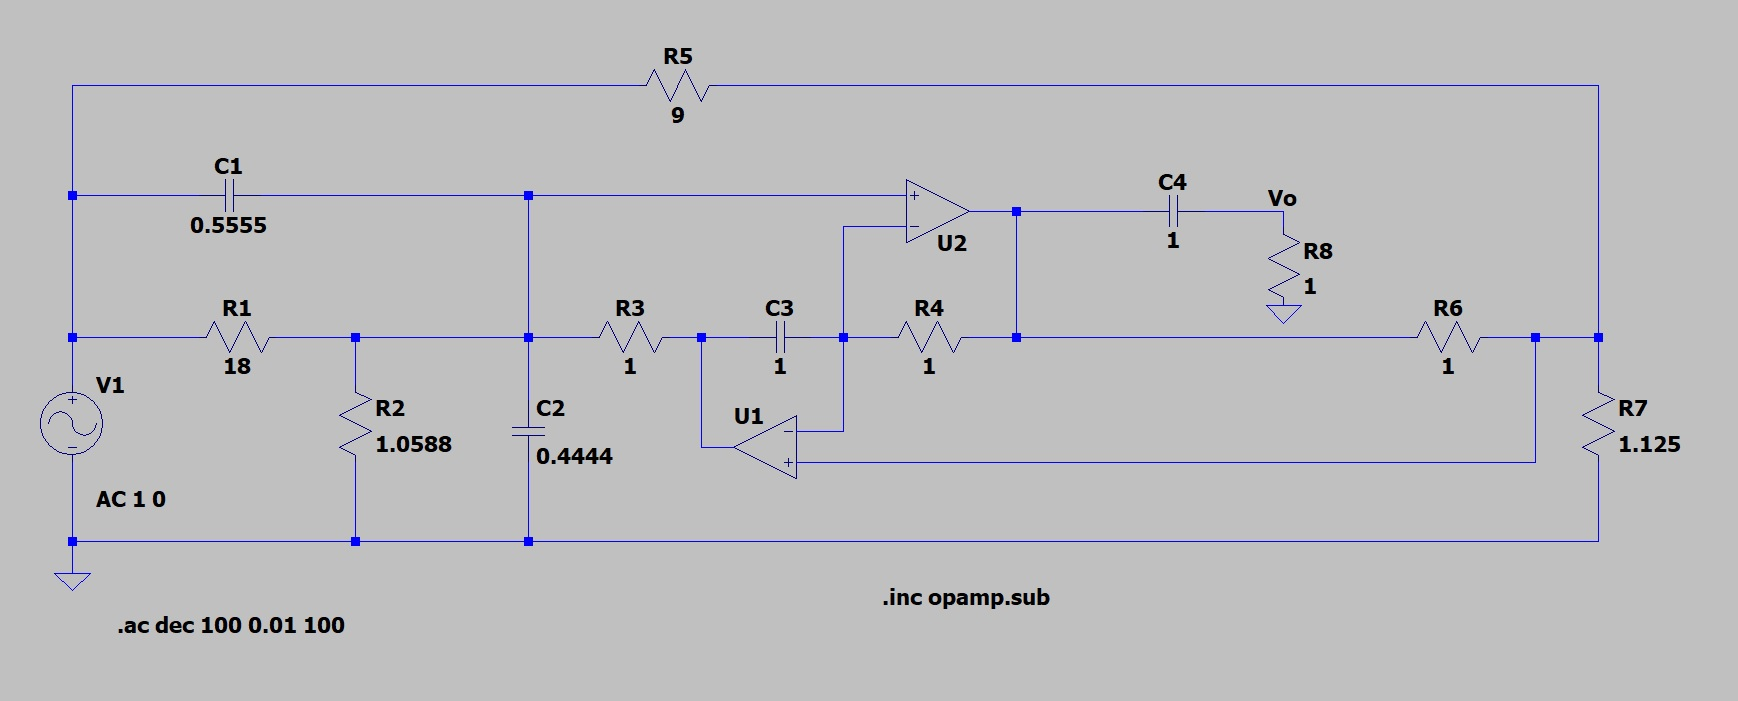

La funcion transferencia de la red propuesta es:

$$ T_{(s)} = \frac{s^2(2a-c)+s(\frac{\omega_o}{Q})(2b-c)+c\omega_o^2}{s^2+s(\frac{\omega_o}{Q})+\omega_o^2} $$

Con la transferencia del filtro pasa altos normalizado se hallan los valores de a, b y c obteniendo...

$ a=\frac{5}{9} , b=\frac{1}{18} \wedge c=\frac{1}{9} $

Y simulando el circuito...

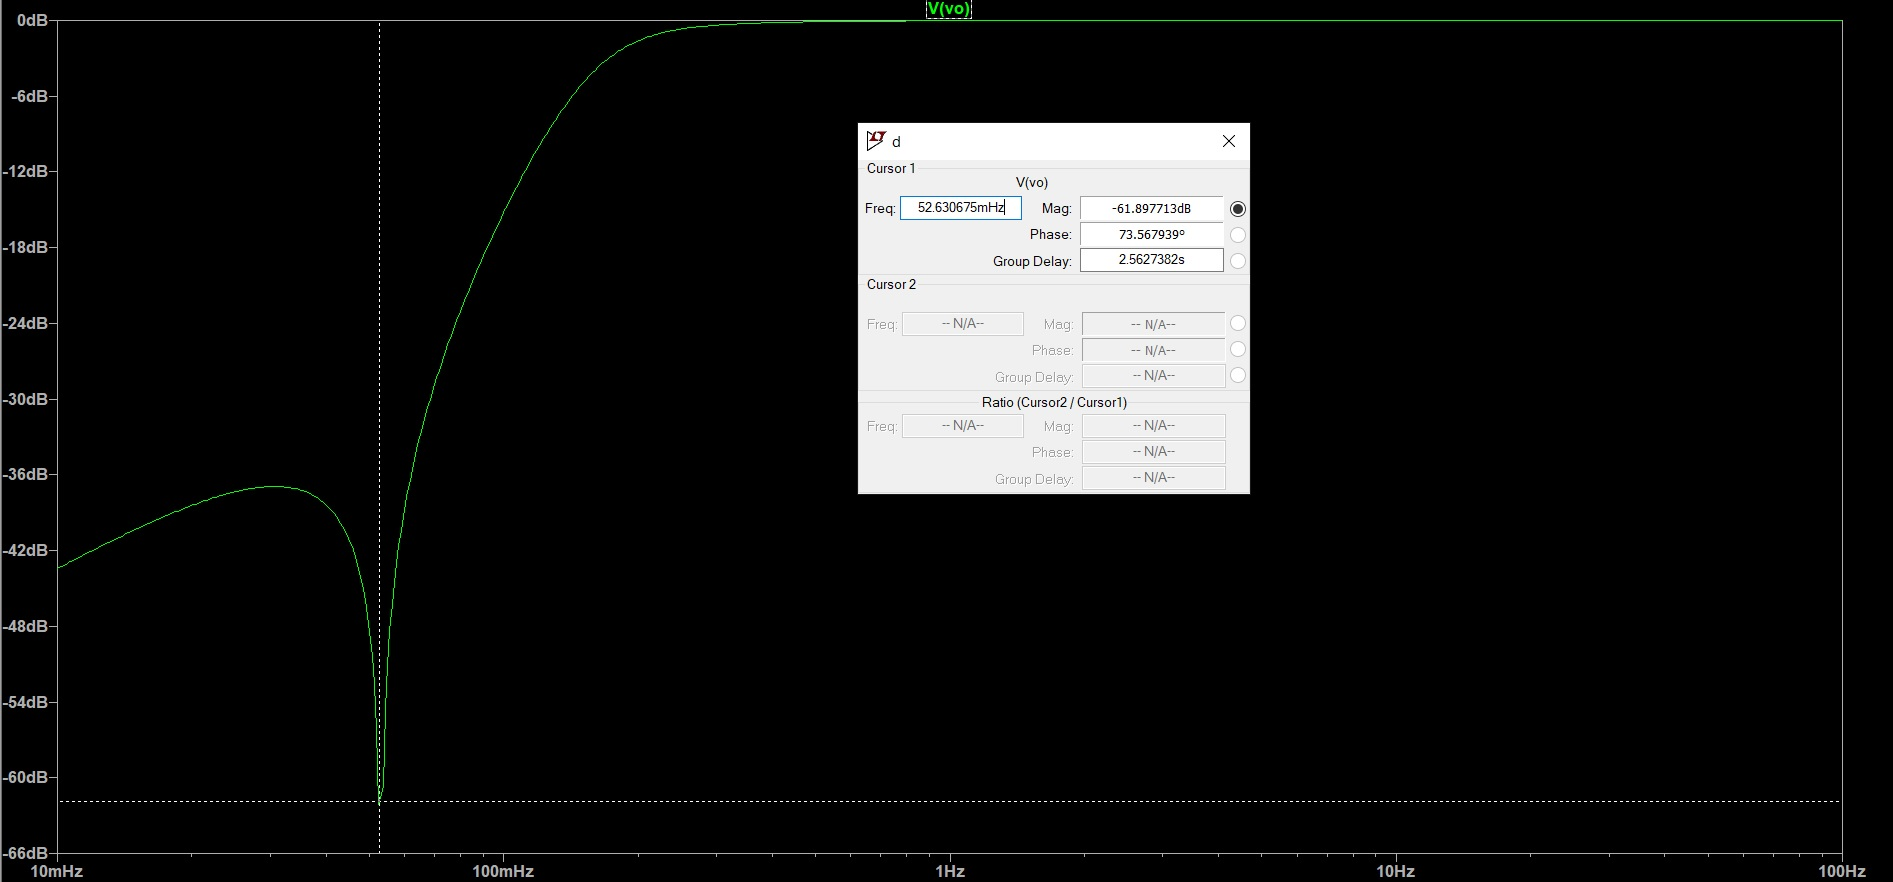

Se puede verificar que con ambos circuitos se obtiene la misma transferencia, aunque con este último se tiene una mayor independencia de parámetros, es más fácil modificar un parámetro sin que otros se vean afectados.